In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append('H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
Exp = pd.read_excel('NeaveExperiments/Nandedkar2014.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq']

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[1], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[1], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[1], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[1], 
        'MnO_Liq': Exp['MnO_Liq'].loc[1], 
        'MgO_Liq': Exp['MgO_Liq'].loc[1], 
        'CaO_Liq': Exp['CaO_Liq'].loc[1], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[1], 
        'K2O_Liq': Exp['K2O_Liq'].loc[1],
        'P2O5_Liq': Exp['P2O5_Liq'].loc[1], 
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [4]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(17,1)

In [ ]:
P = 7000
H2O_Liq = np.array([2, 3, 4])
Results_102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = P, find_liquidus = True,
                       H2O_Liq = H2O_Liq,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.0)

Results_Pconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = P, find_liquidus = True,
                       H2O_Liq = H2O_Liq,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.0)


Results_H2Oconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = np.array([4000,7000,10000]), find_liquidus = True,
                       H2O_Liq = 3,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.0)



  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 2.0 ... Complete (time taken = 540.04 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ...

In [ ]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_102:
    Results_102[index]['All'][Elements] = 100*Results_102[index]['All'][Elements].values/np.nansum(Results_102[index]['All'][Elements], axis = 1).reshape(len(Results_102[index]['All']['SiO2_Liq']),1)
    Results_Pconst[index]['All'][Elements] = 100*Results_Pconst[index]['All'][Elements].values/np.nansum(Results_Pconst[index]['All'][Elements], axis = 1).reshape(len(Results_Pconst[index]['All']['SiO2_Liq']),1)
    Results_H2Oconst[index]['All'][Elements] = 100*Results_H2Oconst[index]['All'][Elements].values/np.nansum(Results_H2Oconst[index]['All'][Elements], axis = 1).reshape(len(Results_H2Oconst[index]['All']['SiO2_Liq']),1)

for i in range(3):
    a[0][i].plot(Results_102['index = 0']['All']['MgO_Liq'],
             Results_102['index = 0']['All'][y[i]], '-', linewidth = 4, color = 'b')    
    a[0][i].plot(Results_Pconst['index = 0']['All']['MgO_Liq'],
             Results_Pconst['index = 0']['All'][y[i]], ':', linewidth = 3, color = 'k') 
    a[0][i].plot(Results_Pconst['index = 1']['All']['MgO_Liq'],
             Results_Pconst['index = 1']['All'][y[i]], '-', linewidth = 5, color = 'k') 
    a[0][i].plot(Results_Pconst['index = 2']['All']['MgO_Liq'],
             Results_Pconst['index = 2']['All'][y[i]], '--', linewidth = 3, color = 'k')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amp')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Amp present')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
        
    a[1][i].plot(Results_H2Oconst['index = 0']['All']['MgO_Liq'],
             Results_H2Oconst['index = 0']['All'][y[i]], ':', linewidth = 3, color = 'k') 
    a[1][i].plot(Results_H2Oconst['index = 1']['All']['MgO_Liq'],
             Results_H2Oconst['index = 1']['All'][y[i]], '-', linewidth = 5, color = 'k') 
    a[1][i].plot(Results_H2Oconst['index = 2']['All']['MgO_Liq'],
             Results_H2Oconst['index = 2']['All'][y[i]], '--', linewidth = 3, color = 'k')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
    
plt.savefig("Nandedkar.eps", dpi = 300, bbox_inches='tight')  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


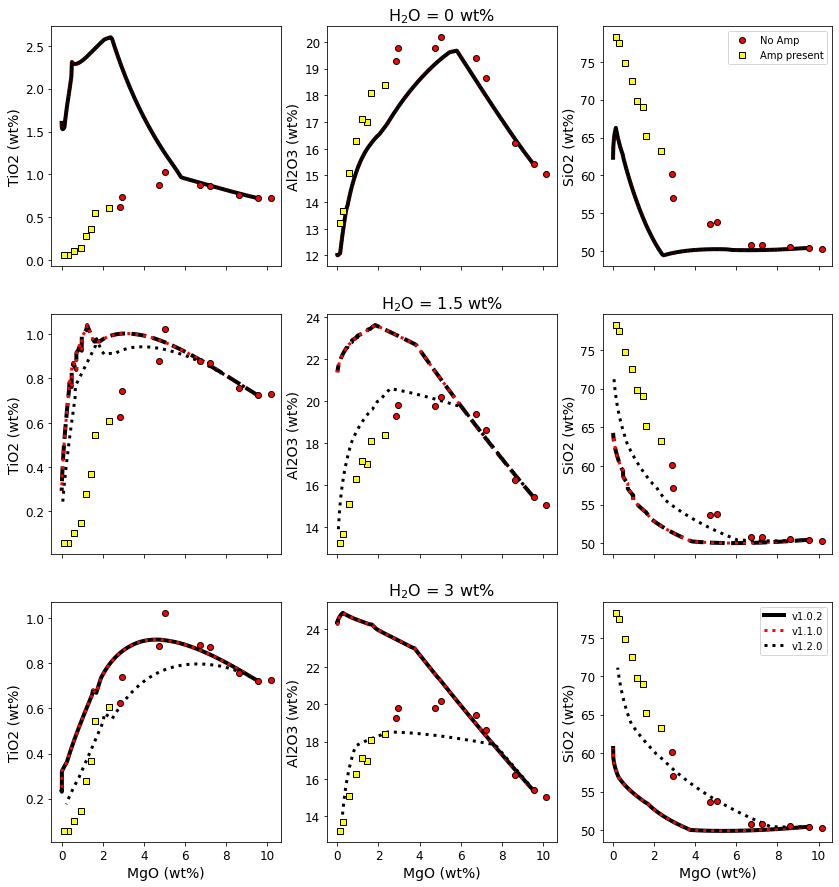

In [6]:
f, a = plt.subplots(3,3, figsize = (14,15), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_102:
    Results_102[index]['All'][Elements] = 100*Results_102[index]['All'][Elements].values/np.nansum(Results_102[index]['All'][Elements], axis = 1).reshape(len(Results_102[index]['All']['SiO2_Liq']),1)
    Results_110[index]['All'][Elements] = 100*Results_110[index]['All'][Elements].values/np.nansum(Results_110[index]['All'][Elements], axis = 1).reshape(len(Results_110[index]['All']['SiO2_Liq']),1)
    Results_120[index]['All'][Elements] = 100*Results_120[index]['All'][Elements].values/np.nansum(Results_120[index]['All'][Elements], axis = 1).reshape(len(Results_120[index]['All']['SiO2_Liq']),1)

for i in range(3):
    a[0][1].set_title('H$_{2}$O = 0 wt%')
    a[0][i].plot(Results_102['index = 0']['All']['MgO_Liq'],
             Results_102['index = 0']['All'][y[i]], '-', linewidth = 4, color = 'k')    
    a[0][i].plot(Results_110['index = 0']['All']['MgO_Liq'],
             Results_110['index = 0']['All'][y[i]], ':', linewidth = 3, color = 'r')
    a[0][i].plot(Results_120['index = 0']['All']['MgO_Liq'],
             Results_120['index = 0']['All'][y[i]], ':', linewidth = 3, color = 'k')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amp')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Amp present')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    
    a[1][1].set_title('H$_{2}$O = 1.5 wt%')
    a[1][i].plot(Results_102['index = 1']['All']['MgO_Liq'],
             Results_102['index = 1']['All'][y[i]], '--', linewidth = 4, color = 'k', label = 'v1.0.2')    
    a[1][i].plot(Results_110['index = 1']['All']['MgO_Liq'],
             Results_110['index = 1']['All'][y[i]], ':', linewidth = 3, color = 'r', label = 'v1.1.0')
    a[1][i].plot(Results_120['index = 1']['All']['MgO_Liq'],
             Results_120['index = 1']['All'][y[i]], ':', linewidth = 3, color = 'k', label = 'v1.2.0')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    
    a[2][1].set_title('H$_{2}$O = 3 wt%')
    a[2][i].plot(Results_102['index = 2']['All']['MgO_Liq'],
             Results_102['index = 2']['All'][y[i]], '-', color = 'k', linewidth = 4, label = 'v1.0.2')    
    a[2][i].plot(Results_110['index = 2']['All']['MgO_Liq'],
             Results_110['index = 2']['All'][y[i]], ':', color = 'r', linewidth = 3, label = 'v1.1.0')
    a[2][i].plot(Results_120['index = 2']['All']['MgO_Liq'],
             Results_120['index = 2']['All'][y[i]], ':', color = 'k', linewidth = 3, label = 'v1.2.0')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')
    
a[2][2].legend()
a[0][2].legend()
plt.savefig("ChangeModel.eps", dpi = 300, bbox_inches='tight')    

In [11]:
P = 7000
Results_Pconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = P, find_liquidus = True,
                       H2O_Liq = np.array([2,3,4]),
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.0)


Results_H2Oconst = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = np.array([4000,7000,10000]), find_liquidus = True,
                       H2O_Liq = 3,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.0)

Results_fO2change = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 850, dt_C = 2, 
                       P_bar = 7000.0, find_liquidus = True,
                       H2O_Liq = 3,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = np.array([-1,0.0,1]))

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 34.56 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 34.09 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 2.0 ... Complete (time taken = 33.46 seconds)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


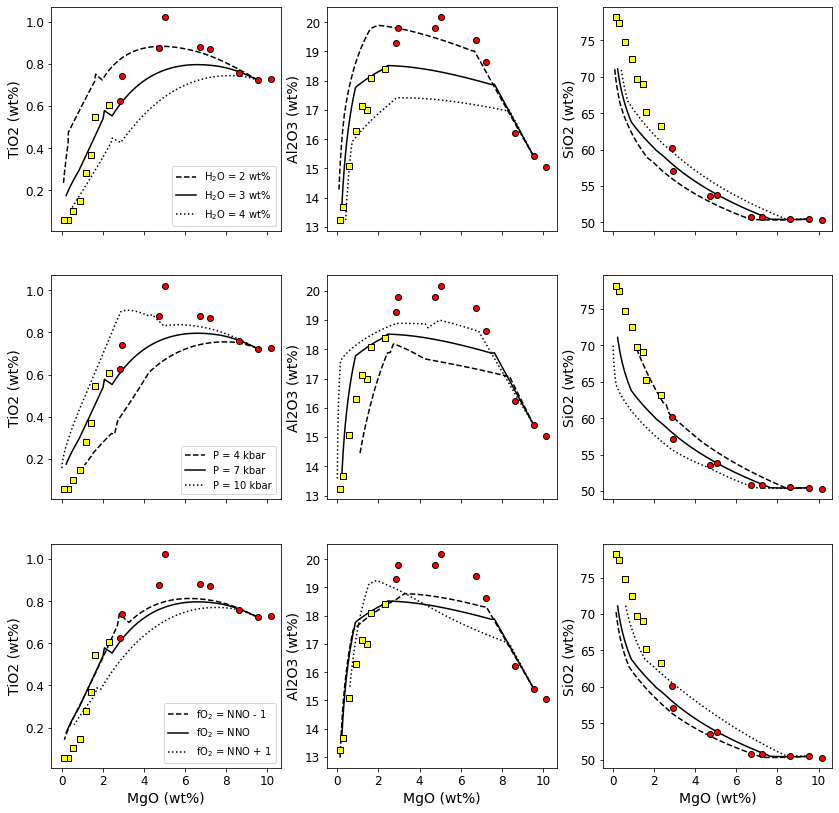

In [12]:
f, a = plt.subplots(3,3, figsize = (14,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_Pconst:
    Results_Pconst[index]['All'][Elements] = 100*Results_Pconst[index]['All'][Elements].values/np.nansum(Results_Pconst[index]['All'][Elements], axis = 1).reshape(len(Results_Pconst[index]['All']['SiO2_Liq']),1)
    Results_H2Oconst[index]['All'][Elements] = 100*Results_H2Oconst[index]['All'][Elements].values/np.nansum(Results_H2Oconst[index]['All'][Elements], axis = 1).reshape(len(Results_H2Oconst[index]['All']['SiO2_Liq']),1)
    Results_fO2change[index]['All'][Elements] = 100*Results_fO2change[index]['All'][Elements].values/np.nansum(Results_fO2change[index]['All'][Elements], axis = 1).reshape(len(Results_fO2change[index]['All']['SiO2_Liq']),1)


for i in range(3):
    a[0][i].plot(Results_Pconst['index = 0']['All']['MgO_Liq'],
             Results_Pconst['index = 0']['All'][y[i]], '--', color = 'k', label = 'H$_{2}$O = 2 wt%')
    a[0][i].plot(Results_Pconst['index = 1']['All']['MgO_Liq'],
             Results_Pconst['index = 1']['All'][y[i]], '-', color = 'k', label = 'H$_{2}$O = 3 wt%')
    a[0][i].plot(Results_Pconst['index = 2']['All']['MgO_Liq'],
             Results_Pconst['index = 2']['All'][y[i]], ':', color = 'k', label = 'H$_{2}$O = 4 wt%')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    
    a[1][i].plot(Results_H2Oconst['index = 0']['All']['MgO_Liq'],
             Results_H2Oconst['index = 0']['All'][y[i]], '--', color = 'k', label = 'P = 4 kbar')
    a[1][i].plot(Results_H2Oconst['index = 1']['All']['MgO_Liq'],
             Results_H2Oconst['index = 1']['All'][y[i]], '-', color = 'k', label = 'P = 7 kbar')
    a[1][i].plot(Results_H2Oconst['index = 2']['All']['MgO_Liq'],
             Results_H2Oconst['index = 2']['All'][y[i]], ':', color = 'k', label = 'P = 10 kbar')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].plot(Results_fO2change['index = 0']['All']['MgO_Liq'],
             Results_fO2change['index = 0']['All'][y[i]], '--', color = 'k', label = 'fO$_{2}$ = NNO - 1')
    a[2][i].plot(Results_fO2change['index = 1']['All']['MgO_Liq'],
             Results_fO2change['index = 1']['All'][y[i]], '-', color = 'k', label = 'fO$_{2}$ = NNO')
    a[2][i].plot(Results_fO2change['index = 2']['All']['MgO_Liq'],
             Results_fO2change['index = 2']['All'][y[i]], ':', color = 'k', label = 'fO$_{2}$ = NNO + 1')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')
    
a[0][0].legend()
a[1][0].legend()
a[2][0].legend()
plt.savefig("ChangeConditions.eps", dpi = 300, bbox_inches='tight') 

In [9]:
P = 7000
Results_Pconst = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P, find_liquidus = True,
                       H2O_Liq = np.array([0.05,0.5,1]),
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0.5)


Results_H2Oconst = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = np.array([4000,7000,18000]), find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0)

Results_fO2change = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = 7000.0, find_liquidus = True,
                       H2O_Liq = 0.05,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = np.array([-3,0.0,1]))

  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 2.0 ... Complete (time taken = 61.96 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 2.0 ... Complete (time taken = 63.75 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 2.0 ... Complete (time taken = 74.85 seconds)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


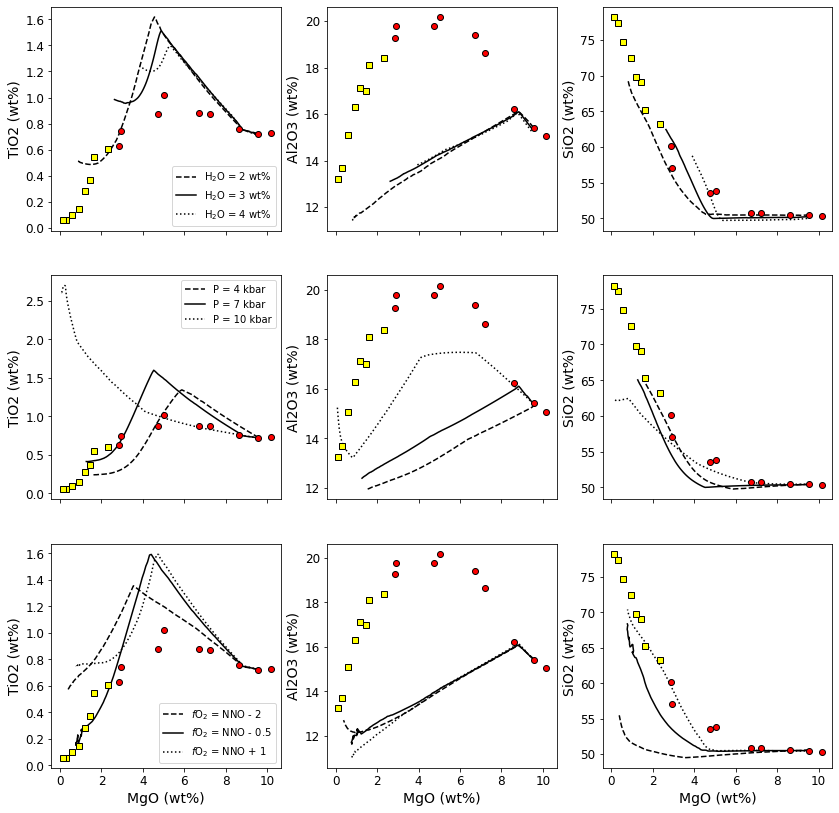

In [10]:
f, a = plt.subplots(3,3, figsize = (14,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for i in range(3):
    a[0][i].plot(Results_Pconst['index = 0']['liq']['MgO_Liq']*100,
             Results_Pconst['index = 0']['liq'][y[i]]*100, '--', color = 'k', label = 'H$_{2}$O = 2 wt%')
    a[0][i].plot(Results_Pconst['index = 1']['liq']['MgO_Liq']*100,
             Results_Pconst['index = 1']['liq'][y[i]]*100, '-', color = 'k', label = 'H$_{2}$O = 3 wt%')
    a[0][i].plot(Results_Pconst['index = 2']['liq']['MgO_Liq']*100,
             Results_Pconst['index = 2']['liq'][y[i]]*100, ':', color = 'k', label = 'H$_{2}$O = 4 wt%')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].plot(Results_H2Oconst['index = 0']['liq']['MgO_Liq']*100,
             Results_H2Oconst['index = 0']['liq'][y[i]]*100, '--', color = 'k', label = 'P = 4 kbar')
    a[1][i].plot(Results_H2Oconst['index = 1']['liq']['MgO_Liq']*100,
             Results_H2Oconst['index = 1']['liq'][y[i]]*100, '-', color = 'k', label = 'P = 7 kbar')
    a[1][i].plot(Results_H2Oconst['index = 2']['liq']['MgO_Liq']*100,
             Results_H2Oconst['index = 2']['liq'][y[i]]*100, ':', color = 'k', label = 'P = 10 kbar')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].plot(Results_fO2change['index = 0']['liq']['MgO_Liq']*100,
             Results_fO2change['index = 0']['liq'][y[i]]*100, '--', color = 'k', label = '$f$O$_{2}$ = NNO - 2')
    a[2][i].plot(Results_fO2change['index = 1']['liq']['MgO_Liq']*100,
             Results_fO2change['index = 1']['liq'][y[i]]*100, '-', color = 'k', label = '$f$O$_{2}$ = NNO - 0.5')
    a[2][i].plot(Results_fO2change['index = 2']['liq']['MgO_Liq']*100,
             Results_fO2change['index = 2']['liq'][y[i]]*100, ':', color = 'k', label = '$f$O$_{2}$ = NNO + 1')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')
    
a[0][0].legend()
a[1][0].legend()
a[2][0].legend()
plt.savefig("MAGEMin.eps", dpi = 300, bbox_inches='tight') 